In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
%matplotlib inline

In [3]:
df = pd.read_csv('../data/features_seattle_911_no_dup_hoods.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.Datetime = pd.to_datetime(df.Datetime)
df.date = pd.to_datetime(df.date)

In [4]:
df.head()

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,dt_crop,date,time,...,seasonality,neighborhood,zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8
0,6900 37th Av S,Medic Response,2011-11-09 23:33:00,47.540683,-122.286131,"(47.540683, -122.286131)",F110104166,11/09/2011 11:33:00 PM,2011-11-09,23:33:00,...,0.889486,Holly Park,0,0,0,0,0,0,0,0
1,N 50th St / Stone Way N,Aid Response,2011-11-09 23:32:00,47.665034,-122.340207,"(47.665034, -122.340207)",F110104164,11/09/2011 11:32:00 PM,2011-11-09,23:32:00,...,0.889486,Wallingford,1,0,0,0,0,0,0,0
2,E John St / E Olive Way,Aid Response,2011-11-09 23:32:00,47.619575,-122.324257,"(47.619575, -122.324257)",F110104165,11/09/2011 11:32:00 PM,2011-11-09,23:32:00,...,0.889486,Broadway,0,0,0,1,0,0,0,0
3,611 12th Av S,Aid Response,2011-11-09 23:29:00,47.597406,-122.317228,"(47.597406, -122.317228)",F110104162,11/09/2011 11:29:00 PM,2011-11-09,23:29:00,...,0.889486,International District,0,0,0,0,1,0,0,0
4,4545 42nd Av Sw,Automatic Medical Alarm,2011-11-09 23:25:00,47.562472,-122.385455,"(47.562472, -122.385455)",F110104161,11/09/2011 11:25:00 PM,2011-11-09,23:25:00,...,0.889486,Genesee,0,0,0,0,0,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574863 entries, 0 to 574862
Data columns (total 36 columns):
Address            574854 non-null object
Type               574863 non-null object
Datetime           574863 non-null datetime64[ns]
Latitude           574863 non-null float64
Longitude          574863 non-null float64
Report Location    544399 non-null object
Incident Number    545879 non-null object
dt_crop            574863 non-null object
date               574863 non-null datetime64[ns]
time               574863 non-null object
date2              574863 non-null object
time2              574863 non-null object
mariners_home      574863 non-null int64
seahawks_home      574863 non-null int64
sounders_home      574863 non-null int64
trav_holiday       574863 non-null int64
dang_holiday       574863 non-null int64
weekday            574863 non-null object
night              574863 non-null int64
Monday             574863 non-null int64
Saturday           574863 non-null int

# Fill nan with 0

In [4]:
def fill_nan(counts):
    counts.date = pd.to_datetime(counts.date)
    counts = counts.set_index(counts.date)
    counts = counts.drop('date', 1)
    date_min = min(df.date)
    date_max = max(df.date)
    idx = pd.date_range(date_min, date_max)

    s = counts.freq

    s.index = pd.DatetimeIndex(s.index)

    s = s.reindex(idx, fill_value=0)

    return s

# Aid resonses in SLU area

In [80]:
q_aid = '''
SELECT
    strftime('%Y %m', date) as date
    ,COUNT(Latitude) AS freq
FROM
    df
WHERE
    type LIKE '%Aid%'
    AND
    zone8 = 1
GROUP BY
    strftime('%Y %m', date);
'''

counts_aid = sqldf(q_aid, globals())
counts_aid.date = pd.to_datetime(counts_aid.date)

In [81]:
counts_aid.head()

,date,freq
0,2010-06-01,14
1,2010-07-01,367
2,2010-08-01,293
3,2010-09-01,292
4,2010-10-01,347


In [82]:
sum(counts_aid.freq)

33071

In [83]:
np.mean(counts_aid.freq)

413.3875

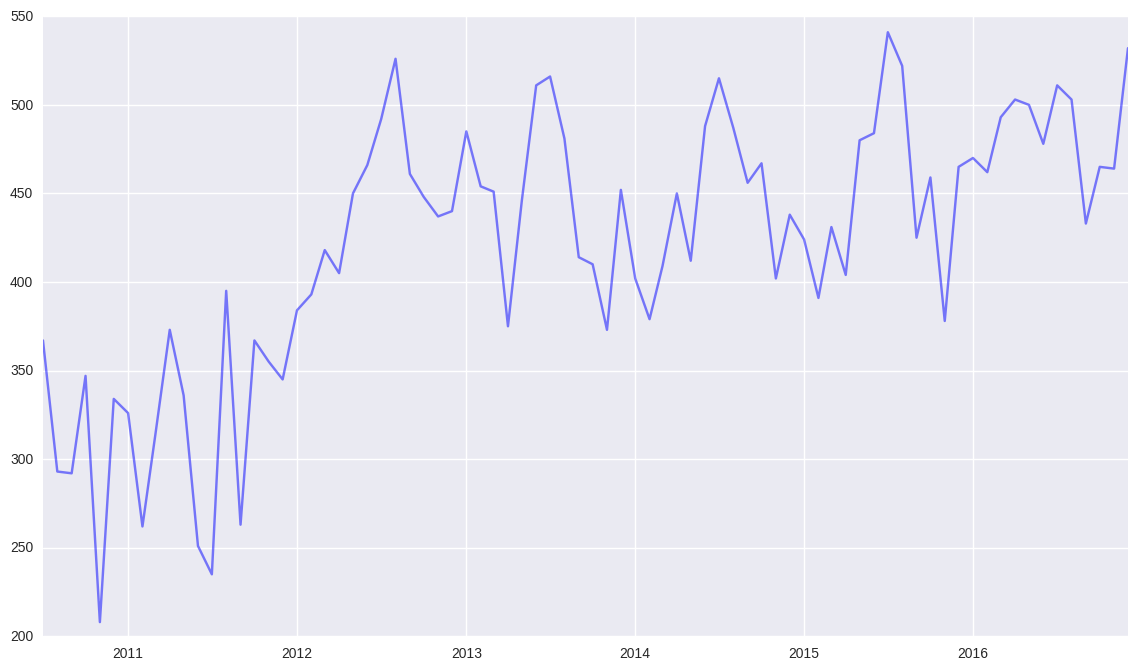

In [84]:
plt.figure(figsize=(14,8))
plt.plot(counts_aid.date[1:-1], counts_aid.freq[1:-1], color='b', alpha=0.5);

# Medic responses in SLU area

In [85]:
q_medic = '''
SELECT
    strftime('%Y %m', date) as date
    ,COUNT(Latitude) AS freq
FROM
    df
WHERE
    type LIKE '%Medic%'
    AND
    zone8 = 1
GROUP BY
    strftime('%Y %m', date);
'''

counts_medic = sqldf(q_medic, globals())
counts_medic.date = pd.to_datetime(counts_medic.date)

In [86]:
counts_medic.head()

,date,freq
0,2010-06-01,11
1,2010-07-01,177
2,2010-08-01,159
3,2010-09-01,163
4,2010-10-01,179


In [87]:
sum(counts_medic.freq)

14015

In [88]:
np.mean(counts_medic.freq)

175.1875

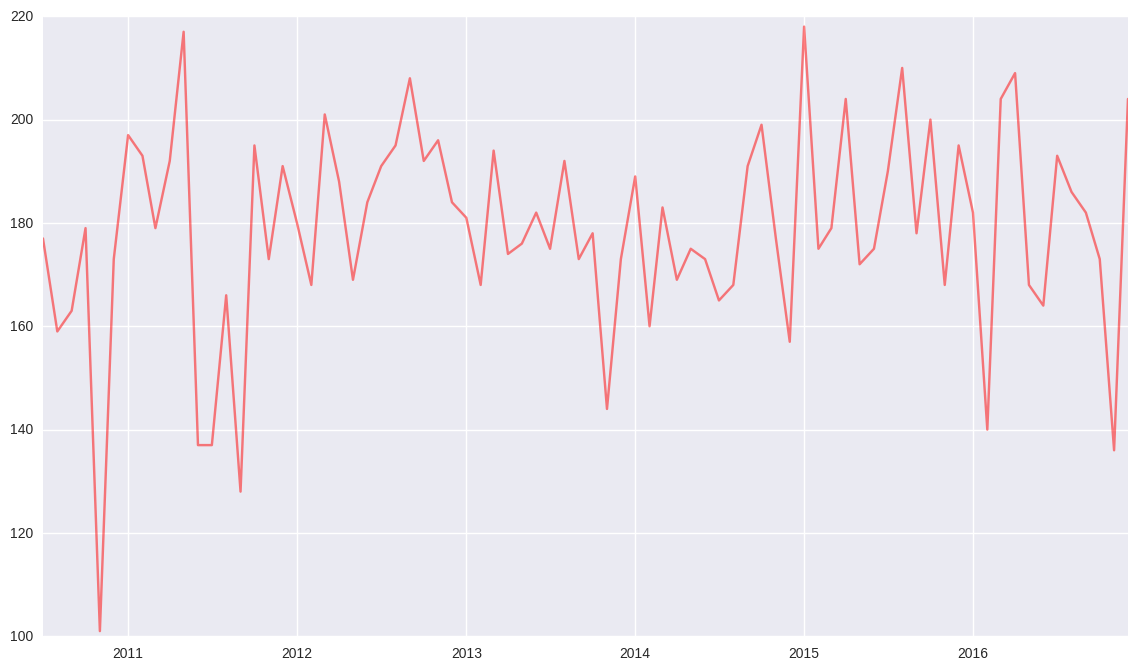

In [89]:
plt.figure(figsize=(14,8))
plt.plot(counts_medic.date[1:-1], counts_medic.freq[1:-1], color='r', alpha=0.5);

# Aid repsonses SLU proper

In [90]:
q_aid = '''
SELECT
    strftime('%Y %m', date) as date
    ,COUNT(Latitude) AS freq
FROM
    df
WHERE
    type LIKE '%Aid%'
    AND
    neighborhood = 'South Lake Union'
GROUP BY
    strftime('%Y %m', date);
'''

counts_aid = sqldf(q_aid, globals())
counts_aid.date = pd.to_datetime(counts_aid.date)

In [91]:
counts_aid.head()

,date,freq
0,2010-06-01,3
1,2010-07-01,55
2,2010-08-01,46
3,2010-09-01,58
4,2010-10-01,61


In [92]:
sum(counts_aid.freq)

6898

In [93]:
np.mean(counts_aid.freq)

86.225

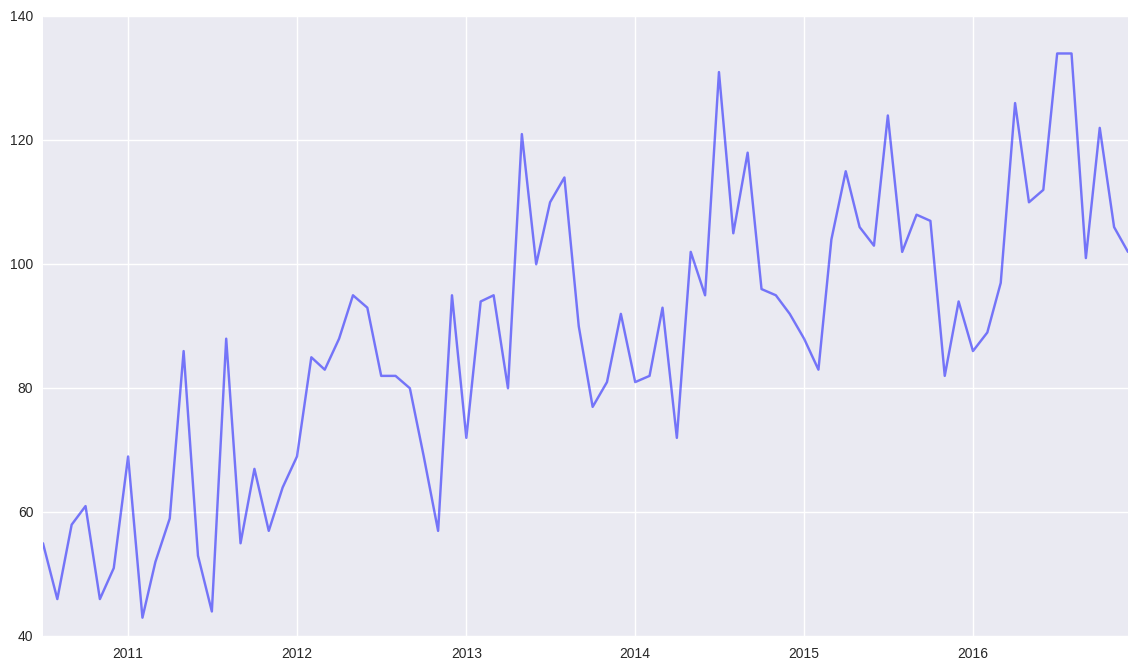

In [94]:
plt.figure(figsize=(14,8))
plt.plot(counts_aid.date[1:-1], counts_aid.freq[1:-1], color='b', alpha=0.5);

# Medic responses SLU proper

In [95]:
q_medic = '''
SELECT
    strftime('%Y %m', date) as date
    ,COUNT(Latitude) AS freq
FROM
    df
WHERE
    type LIKE '%Medic%'
    AND
    neighborhood = 'South Lake Union'
GROUP BY
    strftime('%Y %m', date);
'''

counts_medic = sqldf(q_medic, globals())
counts_medic.date = pd.to_datetime(counts_medic.date)

In [96]:
counts_medic.head()

,date,freq
0,2010-06-01,1
1,2010-07-01,23
2,2010-08-01,16
3,2010-09-01,12
4,2010-10-01,26


In [97]:
sum(counts_medic.freq)

2156

In [98]:
np.mean(counts_medic.freq)

26.95

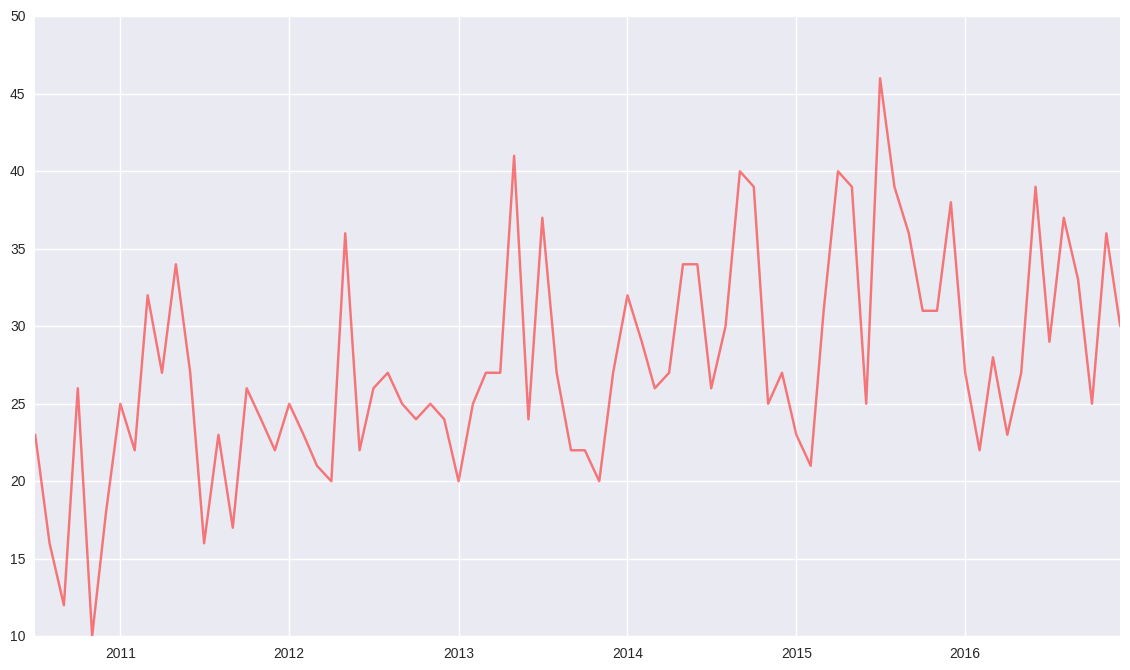

In [99]:
plt.figure(figsize=(14,8))
plt.plot(counts_medic.date[1:-1], counts_medic.freq[1:-1], color='r', alpha=0.5);

# Total responses SLU proper

In [100]:
q_total = '''
SELECT
    strftime('%Y %m', date) as date
    ,COUNT(Latitude) AS freq
FROM
    df
WHERE
    neighborhood = 'South Lake Union'
GROUP BY
    strftime('%Y %m', date);
'''

counts_total = sqldf(q_total, globals())
counts_total.date = pd.to_datetime(counts_total.date)

In [101]:
counts_total.head()

,date,freq
0,2010-06-01,6
1,2010-07-01,109
2,2010-08-01,87
3,2010-09-01,105
4,2010-10-01,130


In [102]:
sum(counts_total.freq)

12249

In [103]:
np.mean(counts_total.freq)

153.1125

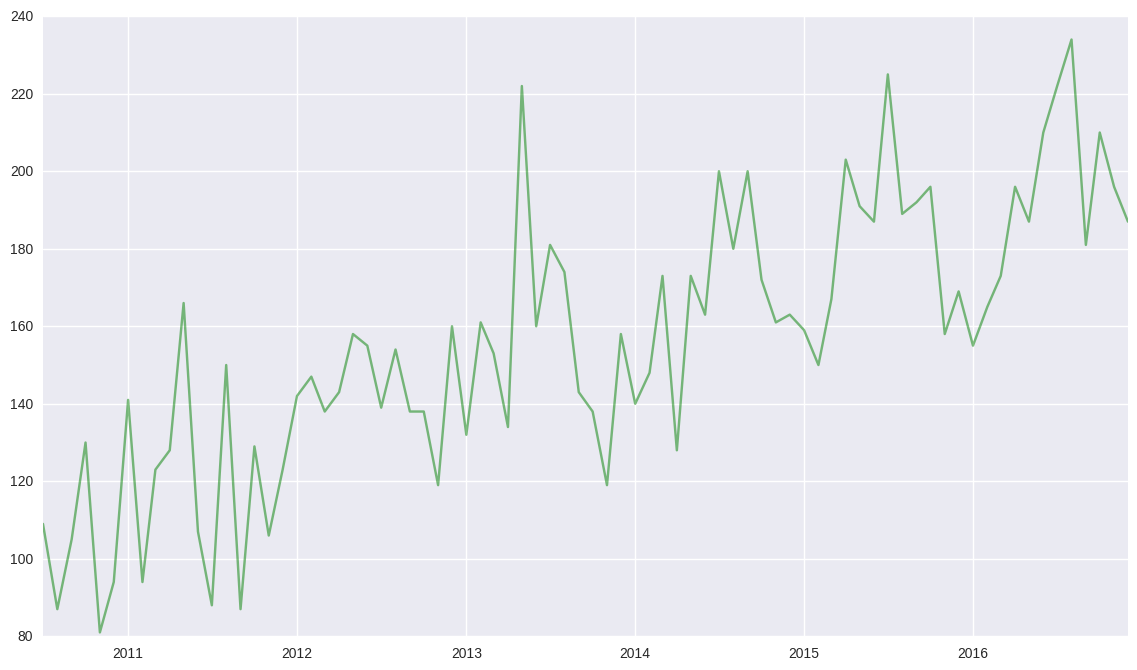

In [105]:
plt.figure(figsize=(14,8))
plt.plot(counts_total.date[1:-1], counts_total.freq[1:-1], color='g', alpha=0.5);

In [106]:
counts_aid.to_csv('../data/SLU_aid_responses_by_month.csv')
counts_medic.to_csv('../data/SLU_medic_responses_by_month.csv')
counts_total.to_csv('../data/SLU_total_responses_by_month.csv')

In [107]:
df[df.neighborhood == 'South Lake Union'].Type.unique()

array(['Aid Response', 'Rescue Elevator', 'Auto Fire Alarm',
       'Medic Response', 'Aid Response Freeway', 'Trans to AMR',
       'Car Fire', 'Motor Vehicle Accident', '1RED 1 Unit',
       'Motor Vehicle Accident Freeway', 'Hang-Up- Aid',
       'Automatic Fire Alarm False', 'Assault w/Weap 7 per Rule',
       'Investigate Out Of Service', 'Alarm Bell', 'EVENT - Special Event',
       'Rescue Heavy', 'Medic Response- 6 per Rule', 'Bark Fire',
       'Food On The Stove Out', 'Aid Response Yellow',
       'Rescue Lock In/Out', 'Fire in Building',
       'Medic Response- 7 per Rule', 'Brush Fire',
       'Automatic Medical Alarm', 'Rubbish Fire', 'Natural Gas Odor',
       'Fire Response Freeway', 'Rescue Rope', 'Spill- Non-Hazmat',
       'HazMat Reduced', 'Unk Odor', 'Fuel Spill', 'Dumpster Fire',
       'Car Fire Freeway', '3RED - 1 +1 + 1', 'Water Job Minor',
       'Electrical Problem', 'Assault w/Weapons- Aid',
       'Boat Taking Water Minr/Sho', '4RED - 2 + 1 + 1',
       'Ass

# Total daily responses SLU proper

In [5]:
q_daily_total = '''
SELECT
    date
    ,COUNT(Latitude) AS freq
FROM
    df
WHERE
    neighborhood = 'South Lake Union'
GROUP BY
    date;
'''

counts_daily_total = sqldf(q_daily_total, globals())
counts_daily_total.date = pd.to_datetime(counts_daily_total.date)

In [13]:
counts_daily_total = fill_nan(counts_daily_total)

In [14]:
counts_daily_total.head()

2010-06-29    5
2010-06-30    1
2010-07-01    6
2010-07-02    4
2010-07-03    4
Freq: D, Name: freq, dtype: int64

In [16]:
sum(counts_daily_total)

12249

In [17]:
np.mean(counts_daily_total)

5.127249895353705

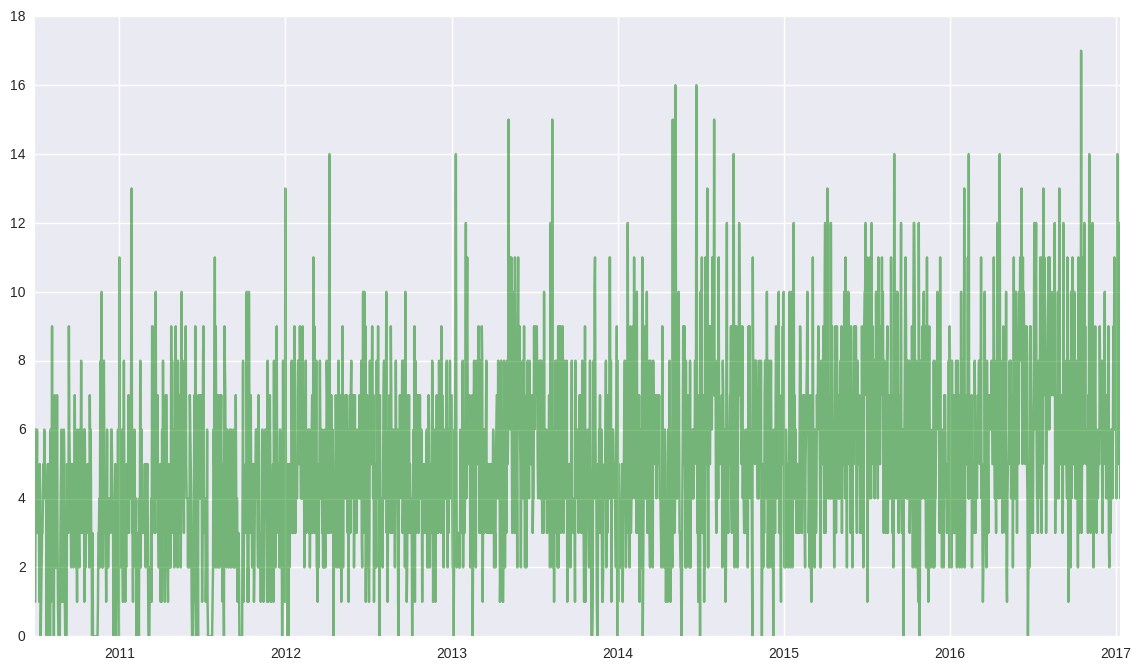

In [19]:
plt.figure(figsize=(14,8))
plt.plot(counts_daily_total[1:-1], color='g', alpha=0.5);